In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import timeit
%matplotlib inline 


def directory_checking(oldpath,newpath):
    if not os.path.exists(oldpath):
        raise OSError(42, 'no such file',oldpath)
    if not os.path.exists(newpath):
        os.makedirs(newpath)



In [23]:

import os
def resize_and_crop_image(path,factor,newpath):
    
    oriimg=cv2.imread(path,cv2.IMREAD_GRAYSCALE)

    
    height, width = oriimg.shape
    imgScale = factor/height
    newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
    newimg = cv2.resize(oriimg,(int(newX),int(newY)))


    newW=int((newimg.shape[1])/2)
    newH=int((newimg.shape[0])/2)

    square_image=newimg[:,newW-newH:newW+newH]
    cv2.imwrite(newpath,square_image)   
    


def recursive_resizing(oldpath,newpath,factor=224):
    
    directory_checking(oldpath,newpath)
    start=timeit.default_timer()
    
    old_path=oldpath+'\*jpeg'
    filenames=glob.glob(old_path)
    for f in filenames:
        new_path=(newpath+(f).strip(oldpath))

        resize_and_crop_image(f,factor,new_path)
   
    stop=timeit.default_timer()
    print("Time: ",stop-start)
    print("Resizing and cropping done.")

recursive_resizing('ori','resize')

    
    

Time:  91.701401756
Resizing and cropping done.


In [ ]:
import numpy as np
import os,errno
import cv2
import timeit
import matplotlib.pyplot as plt
import glob
%matplotlib inline 


        

def apply_gaussian_noise(oldpath, newpath, mean, var):
        
    image=cv2.imread(oldpath)

    output=image.astype("float32")

    row,col,ch= output.shape
    
    gauss = np.random.normal(mean,var**0.5,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    img_after=output/255

    image = img_after + gauss  

    noisy=(image * 255).astype(np.uint8)
    cv2.imwrite(newpath,noisy)

    return noisy



def recursive_gaussian(oldpath,newpath,mean=0,var=0.01):
    
    directory_checking(oldpath,newpath)
    
    start=timeit.default_timer()
  
    old_path=oldpath+'\*jpeg'
    filenames=glob.glob(old_path)

    
    for f in filenames:

        new_path=(newpath+(f).strip(oldpath))

        apply_gaussian_noise(f,new_path,mean,var)
    stop=timeit.default_timer()
    
    print("Variance now: ",var)
    print("Time: ",stop-start)

def gaussian_for_range(start,end,step,oldpath,newpath):
    time_start=timeit.default_timer()
    print(start,end,step)
    
    for i in np.arange(start,end,step):
        print(i)
        recursive_gaussian(oldpath,newpath+'_'+str(i),0,i/1000)
        
    stop=timeit.default_timer()
        
    print("Time for guassian: ",stop-time_start)
    print("Apply gaussian noises done.") 

gaussian_for_range(5,51,5,'resize','gaus')

5 51 5
5
Variance now:  0.005
Time:  37.97694383899989
10
Variance now:  0.01
Time:  37.968182568999964
15
Variance now:  0.015
Time:  38.01138763600011
20
Variance now:  0.02
Time:  38.17092042100012
25
Variance now:  0.025
Time:  37.94318191699995
30
Variance now:  0.03
Time:  37.42184861800024
35
Variance now:  0.035
Time:  43.498043656999926
40
Variance now:  0.04
Time:  38.585484111999904
45
Variance now:  0.045
Time:  39.64833872899999
50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


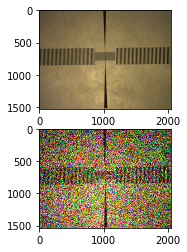

In [29]:
##try out gaussian##

f,arr=plt.subplots(2,1)

img=cv2.imread('9459.jpeg')

output=img.astype("float32")

row,col,ch= output.shape


    
gauss = np.random.normal(0,0.05**0.5,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
img_after=output/255

image = img_after + gauss  

noisy=(image * 255).astype(np.uint8)
cv2.imwrite('noisy.jpeg',noisy) 

arr[0].imshow(img_after[...,::-1])
arr[1].imshow(image[...,::-1])

#arr[1,0].imshow(noisy[...,::-1])
#arr[1,1].imshow(noisy_RGB)

In [3]:
##Posion noises
##not included in the preprocessing pipeline

image=cv2.imread('9459.jpeg')
vals = len(np.unique(image))
vals = 0.8 ** np.ceil(np.log2(vals))
noisy = np.random.poisson(image * vals) / float(vals)
noisy=(noisy*255).astype(np.uint8)
plt.imshow(noisy)


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import timeit

def apply_vignetting(oldpath,newpath,var):
    img = cv2.imread(oldpath,0)
    
    rows,cols = img.shape

    a = cv2.getGaussianKernel(cols,var)
    b = cv2.getGaussianKernel(rows,var)
    c = b*a.T
    d = c/c.max()
    e = img*d

    cv2.imwrite(newpath,e)   

def recursive_vignetting(oldpath,newpath,var):
    
    directory_checking(oldpath,newpath)

  
    old_path=oldpath+'\*jpeg'
    filenames=glob.glob(old_path)

    
    for f in filenames:

        new_path=(newpath+(f).strip(oldpath))

        apply_vignetting(f,new_path,var)

    




def vigneeting_for_range(begin,end,step,oldpath):

    for i in np.arange(begin,end,step):
        recursive_vignetting(oldpath,oldpath+'_vignetting'+'_'+str(i),i)
    
    



def apply_vigneeting_bunch(start,end,step,oldpath):
    overall_start=timeit.default_timer()
    for file in os.listdir('.'):
        filename = os.fsdecode(file)
        if filename.startswith("gaus"): 
            start_timer=timeit.default_timer()
            print(filename)
            vigneeting_for_range(start,end,step,filename)
            stop=timeit.default_timer()
            print('Vigneeting for '+filename+" done")
            print("Time: ",stop-start_timer)
    
    overall_stop=timeit.default_timer()
    print("Apply vigneeting done.") 
    print("TIme: ",overall_stop-overall_start)
    
apply_vigneeting_bunch(50,301,50,'gaus')

gaus_0
Vigneeting for gaus_0 done
Time:  94.132260531
gaus_10
Vigneeting for gaus_10 done
Time:  106.11178095899999
gaus_15
Vigneeting for gaus_15 done
Time:  107.54316358599999
gaus_20
Vigneeting for gaus_20 done
Time:  100.18802854199998
gaus_25
Vigneeting for gaus_25 done
Time:  106.445293123
gaus_30
Vigneeting for gaus_30 done
Time:  143.50590892899993
gaus_35
Vigneeting for gaus_35 done
Time:  108.04702609900005
gaus_40
Vigneeting for gaus_40 done
Time:  108.41882719
gaus_45
Vigneeting for gaus_45 done
Time:  107.83679314599999
gaus_5
Vigneeting for gaus_5 done
Time:  113.05508376499995
gaus_50
Vigneeting for gaus_50 done
Time:  101.530311063
Apply vigneeting done.
TIme:  1196.831445995


True

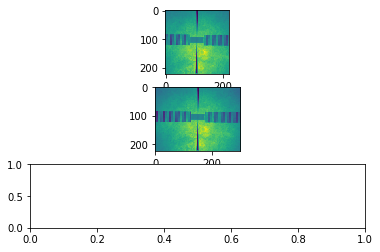

In [13]:
## try out resizing and cropping

f,arr=plt.subplots(3,1)
oriimg=cv2.imread('9459.jpeg',cv2.IMREAD_GRAYSCALE)
height, width = oriimg.shape
imgScale = 224/height
newX,newY = oriimg.shape[1]*imgScale, oriimg.shape[0]*imgScale
newimg = cv2.resize(oriimg,(int(newX),int(newY)))


newW=int((newimg.shape[1])/2)
newH=int((newimg.shape[0])/2)

square_image=newimg[:,newW-newH:newW+newH]


arr[0].imshow(square_image[...,::-1])
arr[1].imshow(newimg[...,::-1])
        
cv2.imwrite('resize.jpeg',square_image)   

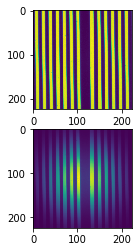

In [9]:
## trying out vignetting
import matplotlib.pyplot as plt
import cv2


def vignetting(oldpath,var):
    img = cv2.imread(oldpath,cv2.IMREAD_GRAYSCALE)

    rows,cols = img.shape

    a = cv2.getGaussianKernel(cols,var)
    b = cv2.getGaussianKernel(rows,var)
    c = b*a.T
    d = c/c.max()
    e = img*d
    return e

f,arr=plt.subplots(2,1)

img=vignetting('13534.jpeg',50)
ori=cv2.imread('13534.jpeg',cv2.IMREAD_GRAYSCALE)
    
arr[0].imshow(ori)  
arr[1].imshow(img)

In [3]:
import os
from os import rename, listdir
import glob
import shutil
import timeit


def change_image_name_in_folder(oldpath,newpath):
    
    old_path=oldpath+'\*jpeg'
    filenames=glob.glob(old_path)
    for name in filenames:

        ori=name.split('\\',1)[-1]
        new_path=newpath+'\\'+oldpath+'_'+ori

        
        
        rename(name,new_path)

        
def change_back_image_name(oldpath):
    old_path=oldpath+'\*jpeg'
    filenames=glob.glob(old_path)
    for name in filenames:

        ori=name.split('_',3)[-1]
        new_path=oldpath+'\\'+ori
        print(name)
        print(ori)
        print(new_path)

        
        rename(name,new_path)
    
        


   

def copy_file_to_antoher_directory(oldpath,newpath):
    directory_checking(oldpath,newpath)
    old_path=oldpath+'\*jpeg'
    filenames=glob.glob(old_path)
    for name in filenames:

        ori=name.split('\\',1)[-1]
        new_path=newpath+'\\'+oldpath+'_'+ori
       
        shutil.copy(name,new_path)

        
        
def change_image_name_in_batch(keyword,newpath):

    for file in os.listdir('.'):
        filename = os.fsdecode(file)
        if filename.startswith(keyword):

            copy_file_to_antoher_directory(filename,newpath)

            
change_image_name_in_batch("gaus_","all")
            